<a href="https://colab.research.google.com/github/briangasca/Models/blob/main/KERAS_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
#Keras Libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

#Importing csv file and splicing the data so our model only trains off of "Open" and "High"
# ':' skips 'Data' header and '1:2' goes to the 'Open' and 'High' columns.
tsla = pd.read_csv("TSLA.csv")
train_data = tsla.iloc[:, 1:2].values


In [2]:
#MinMax scaler that makes values between 0 and 1. We use this on training data
sc = MinMaxScaler(feature_range=(0,1))
training_data_scaled = sc.fit_transform(train_data)

#We will now make 3D arrays to feed to the model.

x_train = []
y_train = []

#60 timesteps in for loop. We then convert x_train to a 3D array and make 60 timestamps, one feature at each step.
for i in range(60, 2956):
  x_train.append(training_data_scaled[i-60:i, 0])
  y_train.append(training_data_scaled[i,0])
x_train = np.array(x_train)
y_train = np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

In [3]:
#Setting up our neural network & Adding layers
model = Sequential()

#Add data to the model with LSTM (Long Short Term Memory).
# 50 units is the dimensionality of the output space, return_sequences=True is set to True because it's necessary for stacking LSTM layers so the output is ALSO a 3D array
# input_shape is just the shape of the training set, so the same set we used in the cell above for x_train.
# 4-Layer Neural Network
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))
#The Dense layer will take input from every neuron in the previous layer and output to every neuron in the next layer.
model.add(Dense(units=1))

#Adam Optimization is a solid neural network algorithm that Keras has. We are also calculating the loss using mean squared error to see how good the model is performing. Lower == Better!!
model.compile(optimizer='adam', loss='mean_squared_error')

#Training the actual model. Inputting x_train (3D array), y_train (1D array), it will run for 100 epochs (basically just 100 times.), batch_size means the number of samples of data that is going to be given per epoch.
#So there is around 2950 different points of data, so 2950 / 32 =~ 91, therefor for each epoch run, 91 little files will be run through the model.
model.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
91/91 [==============================] - 14s 17ms/step - loss: 0.0044
Epoch 2/100
91/91 [==============================] - 1s 16ms/step - loss: 0.0014
Epoch 3/100
91/91 [==============================] - 1s 13ms/step - loss: 0.0020
Epoch 4/100
91/91 [==============================] - 1s 13ms/step - loss: 0.0016
Epoch 5/100
91/91 [==============================] - 1s 13ms/step - loss: 0.0013
Epoch 6/100
91/91 [==============================] - 1s 13ms/step - loss: 0.0012
Epoch 7/100
91/91 [==============================] - 1s 13ms/step - loss: 0.0012
Epoch 8/100
91/91 [==============================] - 1s 12ms/step - loss: 0.0013
Epoch 9/100
91/91 [==============================] - 1s 13ms/step - loss: 0.0011
Epoch 10/100
91/91 [==============================] - 1s 12ms/step - loss: 0.0011
Epoch 11/100
91/91 [==============================] - 2s 17ms/step - loss: 0.0012
Epoch 12/100
91/91 [==============================] - 1s 16ms/step - loss: 0.0010
Epoch 13/100
91/91 [====

In [13]:
# model.save('/model.keras')

dataset_test = pd.read_csv('TSLA(1).csv')
test_data = dataset_test.iloc[:,1:2].values

In [26]:
#Dataset_total concatenates both the train set and test set in a 1D array
dataset_total = pd.concat((tsla['Open'], dataset_test['Open']), axis=0)
#inputs is just dataset_total[].values with a 60 timestep
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

#Rshape to 2D array
inputs = inputs.reshape(-1,1)

#Makes inputs between 0 and 1 so that Keras has a better time with prediction.
inputs = sc.transform(inputs)

#empty list we append to
x_test = []


#For i in range from 60 (timstep ) to 321 (60 + length of the dataset using dataset_test.shape)
for i in range(60, 312):
  x_test.append(inputs[i-60:i,0])

#make x_test into a numpy array
x_test = np.array(x_test)
#Reshape x_test to a 3D array for Keras to go through
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#Keras Prediction
predicted_stock_price = model.predict(x_test)

#Change back to numerical values instead of values between 0-1 so that we can display it well on graph.
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

3208
8/8 [==============================] - 0s 8ms/step


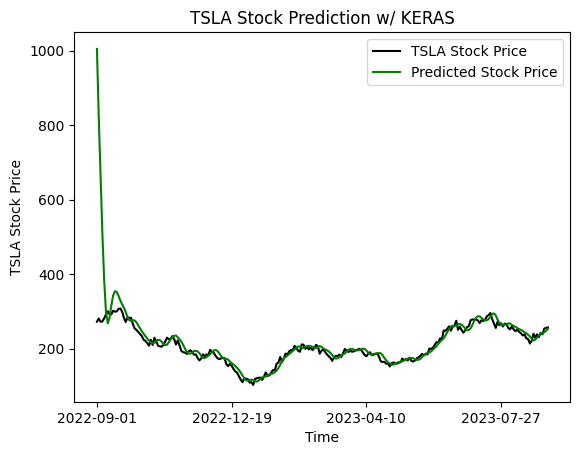

In [25]:
#Plotting

plt.plot(test_data, color='black', label='TSLA Stock Price')
plt.plot(predicted_stock_price, color='green',label = 'Predicted Stock Price')
plt.title('TSLA Stock Prediction w/ KERAS')
plt.xlabel('Time')
plt.ylabel('TSLA Stock Price')

#Every 75 indicdes in dataset_test, pick a date and make it a tick on the x-axis
plt.xticks(np.arange(0,252, 75), dataset_test['Date'][0:252:75])

plt.legend()
plt.show()